In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from ipywidgets import interact

# Week 1

## Contents

## What is Machine Learning(ML)?

There are two definitions of ML, 

1. Offered by Arthur Samuel as,
> "The field of study that gives computers the ability to learn without being explicitly programmed."

This is an older version of the definition and quite informal one at that.

2. Offered by Tom Mitchell, a more concise and formal,
> "A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E."


**For example:** playing chess/checkers or take any board games,

E = the experience of the playing many games of chess

T = task of playing chess

P = the probability that the program will win the next game of chess against new opponents.

**Another example:** Predicing Housing Prices

E (Input Data): Housing Prices

T (Task): Predict prices

P (Performance): Accurate prices

$$E \cdot T = P$$

**In Short:** We can say the process of learning begins with experience **E** i.e. observations or data collected, and task **T** looks for patterns in that data, and applies performance measure **P** to make better decisions in the future based on the examples of experience we provide.

## Supervised Learning

In supervised learning, we are given a data set and already know what our correct output should look like, having the idea that there is a relationship between the input and the output.

Supervised learning problems are categorized into *regression* and *classification* problems. In a regression problem, we are trying to predict results within a continuous output, meaning that we are trying to map input variables to some continuous function. In a classification problem, we are instead trying to predict results in a discrete output. In other words, we are trying to map input variables into discrete categories.



Example 1:

Given data about the size of houses on the real estate market, try to predict their price. Price as a function of size is a continuous output, so this is a regression problem.

We could turn this example into a classification problem by instead making our output about whether the house "sells for more or less than the asking price." Here we are classifying the houses based on price into two discrete categories.

Example 2:

(a) Regression - Given a picture of a person, we have to predict their age on the basis of the given picture

(b) Classification - Given a patient with a tumor, we have to predict whether the tumor is malignant or benign.

## Unsupervised Learning

Unsupervised learning allows us to approach problems with little or no idea what our results should look like. We can derive structure from data where we don't necessarily know the effect of the variables.

We can derive this structure by clustering the data based on relationships among the variables in the data.

With unsupervised learning there is no feedback based on the prediction results.

Example:

Clustering: Take a collection of 1,000,000 different genes, and find a way to automatically group these genes into groups that are somehow similar or related by different variables, such as lifespan, location, roles, and so on.

Non-clustering: The "Cocktail Party Algorithm", allows you to find structure in a chaotic environment. (i.e. identifying individual voices and music from a mesh of sounds at a [cocktail party](https://en.wikipedia.org/wiki/Cocktail_party_effect)).

## Model and Cost Function

### Model Reprensentation

To establish notation for future use, we'll use $x^{(i)}x(i)$ to denote the "input" variables (living area in this example), also called input features, and $y^{(i)}y(i)$ to denote the "output" or target variable that we are trying to predict (price). A pair $(x^{(i)} , y^{(i)} )$ is called a training example, and the dataset that we'll be using to learn $-$ a list of $m$ training examples $(x^{(i)}x(i));i=1,...,m$ \- is called a training set. Note that the superscript "(i)" in the notation is simply an index into the training set, and has nothing to do with exponentiation. We will also use X to denote the space of input values, and Y to denote the space of output values. In this example, $X = Y = \Re$.

To describe the supervised learning problem slightly more formally, our goal is, given a training set, to learn a function $h : X → Y$ so that $h(x)$ is a "good" predictor for the corresponding value of y. For historical reasons, this function h is called a hypothesis. Seen pictorially, the process is therefore like this:

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/H6qTdZmYEeaagxL7xdFKxA_2f0f671110e8f7446bb2b5b2f75a8874_Screenshot-2016-10-23-20.14.58.png?expiry=1552953600000&hmac=6YTb81R0Zjib1PpzRqixlSW0UI7SD8Jcb_eDx0j5uPg)

When the target variable that we're trying to predict is continuous, such as in our housing example, we call the learning problem a regression problem. When y can take on only a small number of discrete values (such as if, given the living area, we wanted to predict if a dwelling is a house or an apartment, say), we call it a classification problem.


### Cost Function

We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference (actually a fancier version of an average) of all the results of the hypothesis with inputs from x's and the actual output y's.

$$J(\theta_0, \theta_1) = \dfrac {1}{2m} \displaystyle \sum_{i=1}^m \left ( \hat{y}_{i}- y_{i} \right)^2 = \dfrac {1}{2m} \displaystyle \sum_{i=1}^m \left (h_\theta (x_{i}) - y_{i} \right)^2$$

To break it apart, it is $\frac{1}{2}\bar{x}$ where $\bar{x}$ is the mean of the squares of $h_\theta(x_{i}) - y_{i}$, or the difference between the predicted value and the actual value.

This function is otherwise called the "Squared error function", or "Mean squared error". The mean is halved $\left(\frac{1}{2}\right)$ as a convenience for the computation of the gradient descent, as the derivative term of the square function will cancel out the $\frac{1}{2}$ term. The following image summarizes what the cost function does:

![](https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/R2YF5Lj3EeajLxLfjQiSjg_110c901f58043f995a35b31431935290_Screen-Shot-2016-12-02-at-5.23.31-PM.png?expiry=1552953600000&hmac=6nCfKeFJPgK_LMVIgmsNd0VmDVxJGTCKHQlreQNPEMo)

In [66]:
# Generate synthetic data to try to fit the best line with theta_0 and theta_1
size = 50 # sample size
beta_0 = 2.5 # actual y-intercept
beta_1 = 0.5 # actual slope
data = {}
data["x"] = np.random.normal(loc=3, scale=15, size=size) # spread of data
data["e"] = np.random.normal(loc=0, scale=4.5, size=size) # noise in data
data["y"] = beta_0 + data["x"] * beta_1 + data["e"] # actual values
data = pd.DataFrame(data)

@interact(theta0=(0, 3, 0.5), theta1=(0, 3, 0.5))
def lineplt(theta0, theta1):
    x = np.arange(-20, 20, 0.1)
    plt.scatter(data.x, data.y)
    plt.plot(x, theta1*x + theta0)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(r'$h(x)=\theta_{0} + \theta_{1}*x$')
    plt.ylim([-20, 20])
    plt.xlim([-20, 20])
    plt.show()

interactive(children=(FloatSlider(value=1.0, description='theta0', max=3.0, step=0.5), FloatSlider(value=1.0, …

In [56]:
2**2

4

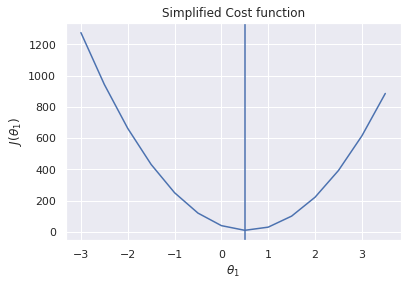

In [64]:
def cost_function(data, theta0, theta1):
    return (1/(2*len(data.x)))*np.sum(((theta0 + theta1*data.x)-data.y)**2)

theta1= np.arange(-3, 4, 0.5)
costs = []
for i in theta1:
    costs.append(cost_function(data, 0, i))
costs = np.array(costs)
plt.plot(theta1, costs)
plt.title('Simplified Cost function')
plt.ylabel(r'$J(\theta_1)$')
plt.xlabel(r'$\theta_1$')
plt.axvline(0.5);

So, from above cost function plot we can verify the best $\theta_1$ value is 0.5, compare that to actual $\beta_0$ is really 0.5, so the cost function does it jobs in minimizing the error. 

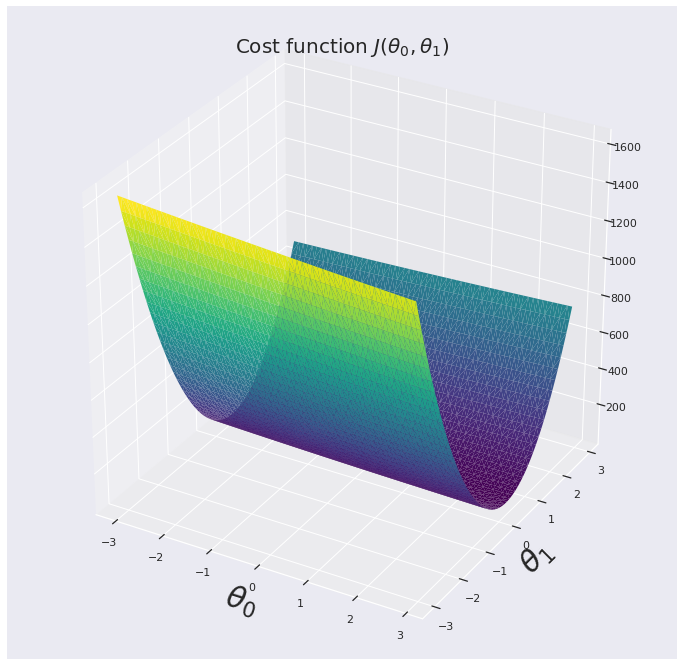

In [80]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

theta0s = np.arange(-3,3, 0.1)
theta1s= np.arange(-3, 3, 0.1)
costs = []
for t0 in theta0s:
    for t1 in theta1s:
        costs.append(cost_function(data, t0, t1))
costs = np.array(costs)

ax.plot_trisurf(myxs,myys,myzs, cmap='viridis', edgecolor='none')

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title(r'Cost function $J(\theta_0, \theta_1)$', fontsize=20)
plt.show()